In [29]:
import os, math, json
import numpy as np
import pandas
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.preprocessing import image
print("Tensorflow version " + tf.__version__)
#tf.enable_eager_execution()
#tf.compat.v1.disable_eager_execution()
AUTO = tf.data.experimental.AUTOTUNE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

Tensorflow version 1.14.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
input_directory = r"drive/My Drive/chest_xray/"
output_directory = r"drive/My Drive/chest_xray/output/"

training_dir = input_directory + r"train"
validation_dir = input_directory + r"val"
testing_dir = input_directory + r"test"

GCS_PATTERN_train = 'drive/My Drive/chest_xray/train/'
GCS_PATTERN_val = 'drive/My Drive/chest_xray/val/'

BATCH_SIZE = 64
TARGET_SIZE = (150,150)
EPOCHS = 5

# splitting data files between training and validation
training_filenames = tf.gfile.Glob(GCS_PATTERN_train+"PNEUMONIA/*.jpeg") + tf.gfile.Glob(GCS_PATTERN_train+"NORMAL/*.jpeg")
validation_filenames = tf.gfile.Glob(GCS_PATTERN_val+"PNEUMONIA/*.jpeg") + tf.gfile.Glob(GCS_PATTERN_val+"NORMAL/*.jpeg")

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255.)
train_generator = train_datagen.flow_from_directory(training_dir, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, class_mode="categorical")

Found 5253 images belonging to 2 classes.


In [6]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(validation_dir, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, class_mode="categorical")

Found 16 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(testing_dir, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, class_mode="categorical")

Found 634 images belonging to 2 classes.


In [8]:
base_model = InceptionV3(weights='imagenet', include_top=False)
base_model.trainable = False

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)
  
final_model = keras.models.Model(inputs=base_model.inputs, outputs=predictions) #create final model

In [9]:
final_model.compile(loss ="categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [10]:
fit_history = final_model.fit_generator(
        train_generator, #train data generator 
        steps_per_epoch=len(train_generator),
        epochs=EPOCHS,
        validation_data=val_generator, #validation data generator 
        validation_steps=len(val_generator))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
83/83 [==============================] - 1315s 16s/step - loss: 0.5892 - acc: 0.9046 - val_loss: 3.1742 - val_acc: 0.5000
Epoch 2/5
83/83 [==============================] - 1284s 15s/step - loss: 0.3252 - acc: 0.9178 - val_loss: 0.8015 - val_acc: 0.5000
Epoch 3/5
83/83 [==============================] - 1293s 16s/step - loss: 0.1787 - acc: 0.9493 - val_loss: 0.4955 - val_acc: 0.8125
Epoch 4/5
83/83 [==============================] - 1287s 16s/step - loss: 0.0934 - acc: 0.9667 - val_loss: 0.4391 - val_acc: 0.8750
Epoch 5/5
83/83 [==============================] - 1286s 15s/step - loss: 0.1002 - acc: 0.9666 - val_loss: 0.6069 - val_acc: 0.6875


Accuracy


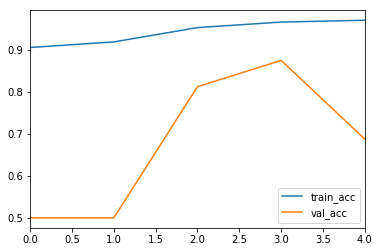

In [32]:
print("Accuracy")
pandas.DataFrame({"train_acc":fit_history.history['acc'], "val_acc":fit_history.history['val_acc']}).plot.line()

Accuracy


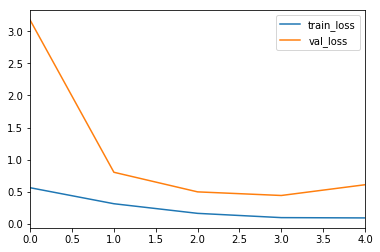

In [33]:
print("Accuracy")
pandas.DataFrame({"train_loss":fit_history.history['loss'], "val_loss":fit_history.history['val_loss']}).plot.line()

In [0]:
GCS_PATTERN_test = 'drive/My Drive/chest_xray/test/'
testing_filenames_p = tf.gfile.Glob(GCS_PATTERN_test+"PNEUMONIA/*.jpeg")
testing_filenames_n = tf.gfile.Glob(GCS_PATTERN_test+"NORMAL/*.jpeg")

In [35]:
test_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [27]:
#Generate true labels
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
def predict_label(filepath):
  img = image.load_img(filepath, target_size=TARGET_SIZE)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  y = final_model.predict(x)

  prediction = "Normal"
  actual = "Normal"

  if "NORMAL" not in filepath:
    actual = "Pneumonia"
  if y.argmax(axis=-1)[0] == 1:
    prediction = "Pneumonia"

  img=mpimg.imread(filename)
  plt.title("Actual: "+ actual+ "\nPrediction: "+ prediction)
  imgplot=plt.imshow(img)

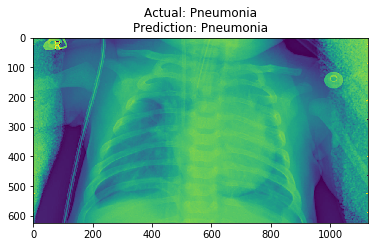

In [76]:
predict_label(testing_filenames_p[0])

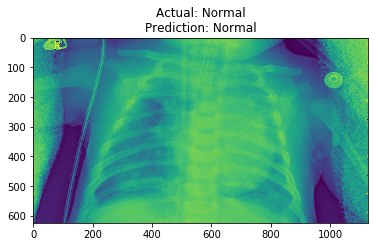

In [77]:
predict_label(testing_filenames_n[5])